In [1]:
import torch

In [ ]:
from bing_image_downloader import downloader

downloader.download(query='마동석',limit=50, output_dir='./', adult_filter_off=True, force_replace=False, timeout=30)
downloader.download(query='카리나',limit=50, output_dir='./', adult_filter_off=True, force_replace=False, timeout=30)
downloader.download(query='장원영',limit=50, output_dir='./', adult_filter_off=True, force_replace=False, timeout=30)


[%] Downloading Images to c:\hantorch\마동석


[!!]Indexing page: 1

[%] Indexed 48 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/APAfqxCqg7k/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/Do_VRQGtDco/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://t1.daumcdn.net/news/202111/01/bigissue/20211101020653425mdmv.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from http://img1.kakaocdn.net/kakaotv/KAKAOACCOUNT/378280071/thumb/20240618232817
[%] File Downloaded !

[%] Downloading Image #5 from https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202404/09/mbn/20240409081427724kfyw.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://img1.kakaocdn.net/kakaotv/KAKAOACCOUNT/1285163955/thumb/20240311142145
[%] File Downloaded !

[%] Downloading Image #7 from https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202405/26/mydaily/202405

# 데이터 가져오기

In [5]:
import os,shutil

def dataset_split(query,train_cnt):

    directory_list = [
        './dataset/train/',
        './dataset/test/',
    ]

    for dir in directory_list:
        if not os.path.isdir(dir+query):  #./dataset/train/마동석
            os.makedirs(dir+query)

    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'trainset : {file_name}')
            shutil.move(query+'/'+file_name, './dataset/train/'+query+'/'+file_name)
        else:
            print(f'testset : {file_name}')
            shutil.move(query+'/'+file_name, './dataset/test/'+query+'/'+file_name)

        cnt += 1

    shutil.rmtree(query)


dataset_split('마동석',40)
dataset_split('카리나',40)
dataset_split('장원영',40)


trainset : Image_1.jpg
trainset : Image_10.jpg
trainset : Image_11.jpeg
trainset : Image_12.jpg
trainset : Image_13.jpg
trainset : Image_14.jpg
trainset : Image_15.jpg
trainset : Image_16.png
trainset : Image_17.jpg
trainset : Image_18.png
trainset : Image_19.jpg
trainset : Image_2.jpg
trainset : Image_20.jpg
trainset : Image_21.jpg
trainset : Image_22.jpg
trainset : Image_23.jpg
trainset : Image_24.jpg
trainset : Image_25.jpg
trainset : Image_26.jpeg
trainset : Image_27.jpg
trainset : Image_28.png
trainset : Image_29.jpg
trainset : Image_3.jpeg
trainset : Image_30.jpg
trainset : Image_31.jpg
trainset : Image_32.jpg
trainset : Image_33.jpg
trainset : Image_34.jpg
trainset : Image_35.jpg
trainset : Image_36.jpg
trainset : Image_37.jpg
trainset : Image_38.jpg
trainset : Image_39.png
trainset : Image_4.jpg
trainset : Image_40.jpg
trainset : Image_41.jpeg
trainset : Image_42.jpg
trainset : Image_43.jpg
trainset : Image_44.jpg
trainset : Image_45.jpg
testset : Image_46.jpg
testset : Image_4

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import time

# 데이터 전처리

In [3]:
transform_train = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])

    ]
)

transform_test = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]
)

In [4]:
train_datasets = datasets.ImageFolder(root='./dataset/train',transform=transform_train)
test_datasets = datasets.ImageFolder(root='./dataset/test',transform=transform_test)

In [5]:
train_datasets.classes

['마동석', '유해진', '장원영', '카리나', '황정민']

In [24]:
len(train_datasets[0])

2

In [31]:
img,label = train_datasets[90]
label

2

In [6]:
import matplotlib.pyplot as plt

def imshow(img, title):
    mean = torch.tensor([0.485,0.456,0.406])
    std = torch.tensor([0.229,0.224,0.225])
    img = img.permute(1,2,0) #역정규화
    img = img * std + mean
    plt.title(title)
    plt.imshow(img)
    plt.show()

In [7]:
train_loader = torch.utils.data.DataLoader(train_datasets, shuffle=True, batch_size=4)
test_loader = torch.utils.data.DataLoader(test_datasets, shuffle=True, batch_size=4)

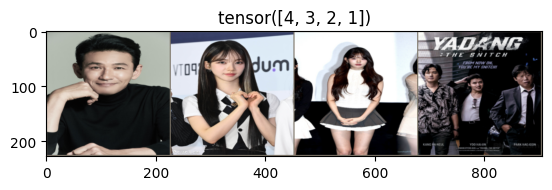

In [8]:
iter = iter(train_loader)
imgs, labels = next(iter)
out_imgs = torchvision.utils.make_grid(imgs)

imshow(out_imgs,labels)

# 모델

In [9]:
model = models.resnet34(pretrained=True)
model

c:\potenup3\prj_deep\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\potenup3\prj_deep\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [38]:
for name,module in model.named_parameters():
    print(name , module.requires_grad)

conv1.weight True
bn1.weight True
bn1.bias True
layer1.0.conv1.weight True
layer1.0.bn1.weight True
layer1.0.bn1.bias True
layer1.0.conv2.weight True
layer1.0.bn2.weight True
layer1.0.bn2.bias True
layer1.1.conv1.weight True
layer1.1.bn1.weight True
layer1.1.bn1.bias True
layer1.1.conv2.weight True
layer1.1.bn2.weight True
layer1.1.bn2.bias True
layer1.2.conv1.weight True
layer1.2.bn1.weight True
layer1.2.bn1.bias True
layer1.2.conv2.weight True
layer1.2.bn2.weight True
layer1.2.bn2.bias True
layer2.0.conv1.weight True
layer2.0.bn1.weight True
layer2.0.bn1.bias True
layer2.0.conv2.weight True
layer2.0.bn2.weight True
layer2.0.bn2.bias True
layer2.0.downsample.0.weight True
layer2.0.downsample.1.weight True
layer2.0.downsample.1.bias True
layer2.1.conv1.weight True
layer2.1.bn1.weight True
layer2.1.bn1.bias True
layer2.1.conv2.weight True
layer2.1.bn2.weight True
layer2.1.bn2.bias True
layer2.2.conv1.weight True
layer2.2.bn1.weight True
layer2.2.bn1.bias True
layer2.2.conv2.weight True


In [40]:
for params in model.parameters():
    params.requires_grad = False

In [41]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [42]:
model.fc = nn.Linear(512,3)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# 학습

In [ ]:
import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
optimizer = optim.Adam(model.parameters(), lr = 1e-4)
criterion = nn.CrossEntropyLoss()
epochs = 20
model = model.to(device)

for epoch in range(epochs):
    for img,labels in tqdm.tqdm(train_loader):
        optimizer.zero_grad()
        preds = model(img.to(device))
        loss = criterion(preds,labels.to(device))
        loss.backward()
        optimizer.step()

    print(loss.item())

100%|██████████| 30/30 [00:03<00:00,  7.76it/s]


0.6411972641944885


100%|██████████| 30/30 [00:03<00:00,  8.85it/s]


0.21003183722496033


100%|██████████| 30/30 [00:03<00:00,  9.19it/s]


0.500684916973114


100%|██████████| 30/30 [00:03<00:00,  9.36it/s]


0.5179209113121033


100%|██████████| 30/30 [00:03<00:00,  9.25it/s]


0.3281245529651642


100%|██████████| 30/30 [00:03<00:00,  7.53it/s]


0.22757881879806519


  7%|▋         | 2/30 [00:00<00:04,  6.25it/s]

# 테스트

tensor([1, 1, 0, 1])


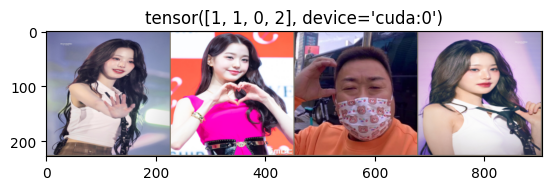

tensor([2, 2, 1, 2])


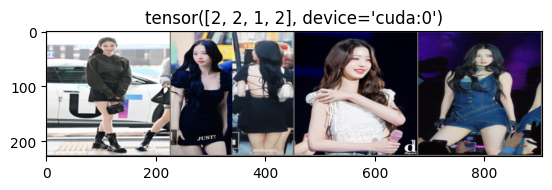

tensor([0, 2, 2, 0])


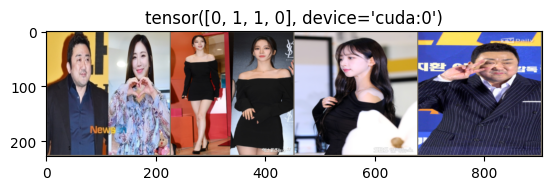

tensor([2, 1, 2, 0])


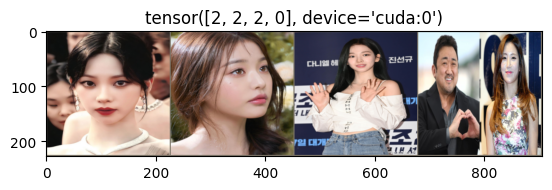

tensor([2, 0, 2, 1])


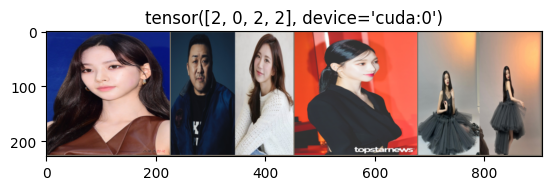

tensor([0, 0, 1, 1])


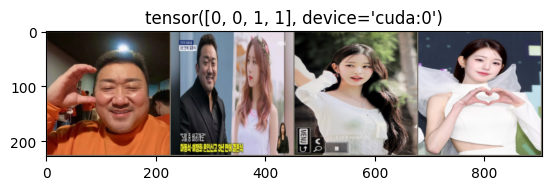

tensor([0, 1, 2, 0])


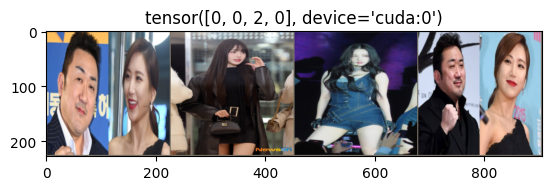

tensor([0, 1])


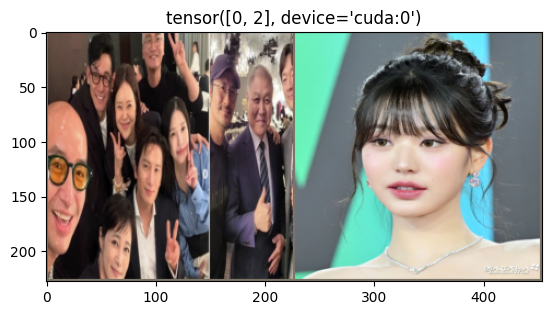

정확도 :  0.7666666666666667


In [49]:
model.eval()
with torch.no_grad():
    corrects = 0

    for img,labels in test_loader:
        preds = model(img.to(device))
        pred = torch.max(preds,1)[1]

        corrects += (pred==labels.to(device)).sum().item()
        img_grid = torchvision.utils.make_grid(img)

        print(labels)
        imshow(img_grid.cpu(), title= pred)

    acc = corrects / len(test_datasets.targets)
    print('정확도 : ',acc)



In [50]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [55]:
for name,grad in model.layer4.named_parameters():
    print(name,grad.requires_grad)

0.conv1.weight False
0.bn1.weight False
0.bn1.bias False
0.conv2.weight False
0.bn2.weight False
0.bn2.bias False
0.downsample.0.weight False
0.downsample.1.weight False
0.downsample.1.bias False
1.conv1.weight False
1.bn1.weight False
1.bn1.bias False
1.conv2.weight False
1.bn2.weight False
1.bn2.bias False
2.conv1.weight False
2.bn1.weight False
2.bn1.bias False
2.conv2.weight False
2.bn2.weight False
2.bn2.bias False


In [59]:
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(512,3)
for param in model.layer4.parameters():
    param.requires_grad = True

# pytorch GradCAM

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [ ]:
import os,shutil
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(512,3)
model.load_state_dict(torch.load('best_model.pth')) #torch.load('best_model.pth'),map_location='cpu' CPU기반 가져올경우

<All keys matched successfully>

In [ ]:
# 학습시 진행한 전처리를 가져옴
# transform_test = transforms.Compose(
#     [
#         transforms.Resize((224,224)),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
#     ]
# )

In [ ]:
from PIL import ImageChops
from PIL import Image
model.eval()
model.to('cuda')
img = Image.open('dataset/train/마동석/Image_17.jpg').convert('RGB')
input_tensor = transform_test(img).unsqueeze(0).to('cuda')

for param in model.parameters():
    param.requires_grad = True

pred = model(input_tensor)
pred_class = pred.argmax().item() # 마동석이 결과로 나옴
pred_class

0

In [ ]:
target_layers = [model.layer4[-1]] # 마지막 레이어 활용

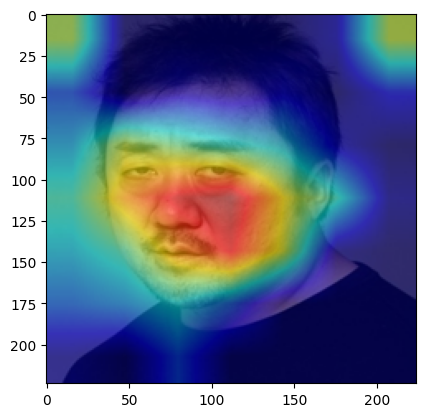

In [43]:
cam = GradCAM(model=model,target_layers=target_layers)
grad_cam = cam(input_tensor=input_tensor,targets=[ClassifierOutputTarget(pred_class)])[0] # 마동석에 해당하는 필터를 적용해라
#grad_cam으로 나온이미지는 224로 나옴

rgb_img = np.array(img.resize((224,224))).astype(np.float32) / 255.0
visualization = show_cam_on_image(rgb_img,grad_cam,use_rgb=True) # 히트맵으로 시각화

plt.imshow(visualization)

# GradCAMPlusPlus : 필터 사용 부분 확인

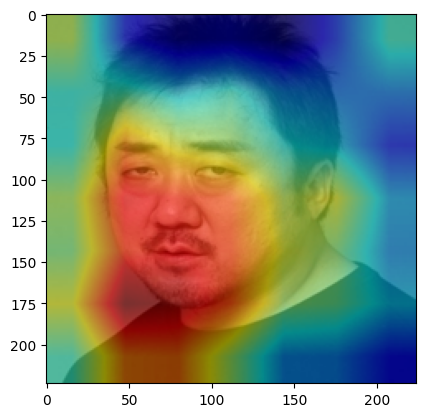

In [44]:
from pytorch_grad_cam import GradCAMPlusPlus

cam = GradCAMPlusPlus(model=model,target_layers=target_layers)
plusplus_cam = cam(input_tensor=input_tensor,targets=[ClassifierOutputTarget(pred_class)])[0] # 마동석에 해당하는 필터를 적용해라
#plusplus_cam으로 나온이미지는 224로 나옴

rgb_img = np.array(img.resize((224,224))).astype(np.float32) / 255.0
visualization = show_cam_on_image(rgb_img,plusplus_cam,use_rgb=True) # 히트맵으로 시각화

plt.imshow(visualization)